In [1]:
def poly_df(array,degree):
    features=array[0]
    degree>=1
    for i in range(2,degree+1):
        name='power_'+str(i)
        array[name]=(features)**i
    return array

In [2]:
import pandas as pd
import numpy as np

In [3]:
w=pd.DataFrame([[1],[2]])

In [4]:
w

,0
0,1
1,2


In [5]:
poly_df(w,5)

,0,power_2,power_3,power_4,power_5
0,1,1,1,1,1
1,2,4,8,16,32


In [6]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    degree>=1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    ...
    poly_dataframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            ...
            poly_dataframe[name]=feature**power
    return poly_dataframe

In [7]:
f=pd.Series([1,2])

polynomial_dataframe(f,5)

,power_1,power_2,power_3,power_4,power_5
0,1,1,1,1,1
1,2,4,8,16,32


In [8]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 
              'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [9]:
feature=sales['sqft_living']
poly_1data=polynomial_dataframe(feature,1)


In [10]:
poly_1data['price']=sales[['price']]

In [11]:

poly_1data=pd.DataFrame(poly_1data)


In [12]:
poly_1data=poly_1data.reset_index(drop=True)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr=LinearRegression()

In [15]:
x=poly_1data['power_1']
x=np.array(x).reshape(-1,1)
y=poly_1data['price']


In [16]:
poly_1model=lr.fit(x,y)

In [17]:
poly_1model.intercept_

-43580.74309447338

In [18]:
poly_1model.coef_

array([280.6235679])

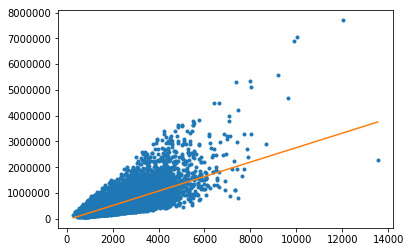

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'.',
x, poly_1model.predict(x),'-')

In [20]:
feature1=sales['sqft_living']
poly_2data=polynomial_dataframe(feature1,2)
poly_2data['price']=sales['price']


In [21]:
poly_2data=pd.DataFrame(poly_2data)

In [22]:
poly_2data=poly_2data.reset_index(drop=True)

In [23]:
poly_2data.describe()

,power_1,power_2,price
count,21613.000000,2.161300e+04,2.161300e+04
mean,2079.899736,5.169478e+06,5.400881e+05
std,918.440897,5.406754e+06,3.671272e+05
min,290.000000,8.410000e+04,7.500000e+04
25%,1427.000000,2.036329e+06,3.219500e+05
50%,1910.000000,3.648100e+06,4.500000e+05
75%,2550.000000,6.502500e+06,6.450000e+05
max,13540.000000,1.833316e+08,7.700000e+06


In [24]:
x1=poly_2data.drop('price',axis=1)

In [25]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
power_1    21613 non-null float64
power_2    21613 non-null float64
dtypes: float64(2)
memory usage: 337.8 KB


In [26]:
y1=poly_2data['price']

In [27]:
y1.count()

21613

In [28]:
poly_2model=lr.fit(x1,y1)

In [29]:
poly_2model.intercept_

199222.279305486

In [30]:
poly_2model.coef_

array([6.79940947e+01, 3.85812609e-02])

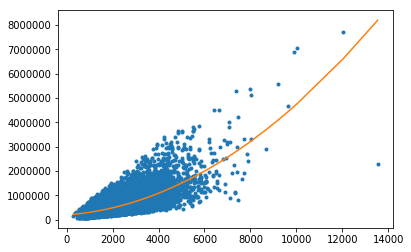

In [31]:

plt.plot(poly_2data['power_1'],y1,'.',
poly_2data['power_1'],poly_2model.predict(x1),'-')

In [32]:
feature2=sales['sqft_living']
poly_3data=polynomial_dataframe(feature2,3)
poly_3data['price']=sales['price']


In [33]:
poly_3data=pd.DataFrame(poly_3data)

In [34]:
poly_3data=poly_3data.reset_index(drop=True)

In [35]:
poly_3data.head()

,power_1,power_2,power_3,price
0,290.0,84100.0,24389000.0,142000.0
1,370.0,136900.0,50653000.0,276000.0
2,380.0,144400.0,54872000.0,245000.0
3,384.0,147456.0,56623104.0,265000.0
4,390.0,152100.0,59319000.0,228000.0


In [36]:
x2=poly_3data.drop('price',axis=1)

In [37]:
y2=poly_3data['price']

In [38]:
poly_3model=lr.fit(x2,y2)

In [39]:
poly_3model.intercept_

336819.74822074623

In [40]:
poly_3model.coef_

array([-9.01819864e+01,  8.70465089e-02, -3.84055260e-06])

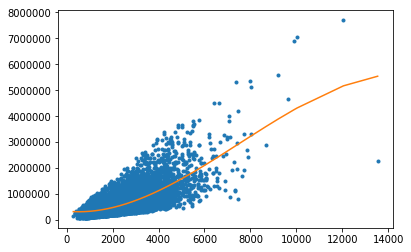

In [41]:
plt.plot(poly_3data['power_1'],y2,'.',
        poly_3data['power_1'],poly_3model.predict(x2))

In [42]:
poly_15data=polynomial_dataframe(sales['sqft_living'],15)

In [43]:
poly_15data=poly_15data.reset_index(drop=True)

In [44]:
poly_15data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36
1,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38
2,380.0,144400.0,54872000.0,2.085136e+10,7.923517e+12,3.010936e+15,1.144156e+18,4.347792e+20,1.652161e+23,6.278212e+25,2.385721e+28,9.065738e+30,3.444980e+33,1.309093e+36,4.974552e+38
3,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38
4,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38


In [45]:
x3=poly_15data

In [46]:
y3=sales['price']

In [53]:
poly_15model=lr.fit(x3,y3)

In [54]:
poly_15model.intercept_

537116.3296377126

In [55]:
poly_15model.coef_

array([ 4.56404164e-91,  1.42712138e-50,  9.26132354e-56,  2.48920611e-60,
        1.19863929e-74,  2.68575522e-71,  2.26147568e-67,  1.85900299e-63,
        1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
        1.61618577e-44, -2.49283826e-48,  9.59718336e-53])

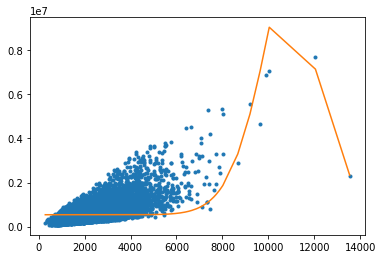

In [56]:
plt.plot(poly_15data['power_1'],sales['price'],'.',
        poly_15data['power_1'],poly_15model.predict(x3),'-')

In [57]:
set1=pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)

In [58]:
set2=pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)

In [59]:
set3=pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)

In [60]:
set4=pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)

In [61]:
polys1_15data=polynomial_dataframe(set1['sqft_living'],15)

In [62]:
polys1_15data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,430.0,184900.0,79507000.0,3.418801e+10,1.470084e+13,6.321363e+15,2.718186e+18,1.168820e+21,5.025926e+23,2.161148e+26,9.292937e+28,3.995963e+31,1.718264e+34,7.388536e+36,3.177070e+39
1,460.0,211600.0,97336000.0,4.477456e+10,2.059630e+13,9.474297e+15,4.358177e+18,2.004761e+21,9.221902e+23,4.242075e+26,1.951354e+29,8.976230e+31,4.129066e+34,1.899370e+37,8.737103e+39
2,470.0,220900.0,103823000.0,4.879681e+10,2.293450e+13,1.077922e+16,5.066231e+18,2.381129e+21,1.119130e+24,5.259913e+26,2.472159e+29,1.161915e+32,5.461000e+34,2.566670e+37,1.206335e+40
3,490.0,240100.0,117649000.0,5.764801e+10,2.824752e+13,1.384129e+16,6.782231e+18,3.323293e+21,1.628414e+24,7.979227e+26,3.909821e+29,1.915812e+32,9.387480e+34,4.599865e+37,2.253934e+40
4,500.0,250000.0,125000000.0,6.250000e+10,3.125000e+13,1.562500e+16,7.812500e+18,3.906250e+21,1.953125e+24,9.765625e+26,4.882812e+29,2.441406e+32,1.220703e+35,6.103516e+37,3.051758e+40


In [63]:
xs1=polys1_15data

In [64]:
ys1=set1['price']

In [65]:
models1_15=lr.fit(xs1,ys1)

In [66]:
models1_15.intercept_

539058.8186676395

In [67]:
models1_15.coef_

array([ 3.05794168e-90,  2.21229726e-49,  8.63174848e-55,  1.21888906e-88,
        3.23082736e-74,  1.10358333e-70,  8.37724029e-67,  6.23411957e-63,
        4.49156442e-59,  3.06938763e-55,  1.91749300e-51,  1.01335180e-47,
        3.62176959e-44, -5.63501661e-48,  2.18641116e-52])

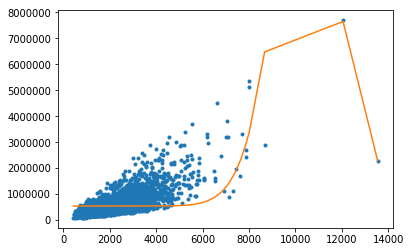

In [68]:
plt.plot(xs1['power_1'],ys1,'.',
xs1['power_1'],models1_15.predict(xs1),'-')


In [69]:
polys2_15data=polynomial_dataframe(set2['sqft_living'],15)

In [70]:
xs2=polys2_15data

In [71]:
ys2=set2['price']

In [72]:
models2_15=lr.fit(xs2,ys2)

In [73]:
models2_15.coef_

array([ 2.68007789e-77, -1.28312242e-39, -1.64859266e-44, -7.97376861e-50,
       -1.04404871e-53,  1.35479902e-58,  3.62867893e-55,  1.49807495e-51,
        5.73974483e-48,  1.95158348e-44,  5.37897085e-41,  9.38035613e-38,
       -3.62478343e-41,  4.63968401e-45, -1.96500735e-49])

In [74]:
models2_15.intercept_

506822.2662653846

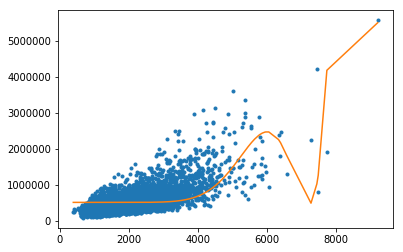

In [75]:
plt.plot(xs2['power_1'],ys2,'.',
xs2['power_1'],models2_15.predict(xs2),'-')


In [76]:
polys3_15data=polynomial_dataframe(set3['sqft_living'],15)

In [77]:
xs3=polys3_15data

In [78]:
ys3=set3['price']

In [79]:
models3_15=lr.fit(xs3,ys3)

In [80]:
models3_15.coef_

array([ 2.83751934e-88,  1.17220379e-48,  1.95623597e-55,  3.22507962e-85,
        1.57170169e-72,  4.27894908e-69,  2.68009626e-65,  1.63911362e-61,
        9.66435015e-58,  5.38044653e-54,  2.72563636e-50,  1.16253248e-46,
        3.33756141e-43, -6.76238818e-47,  3.43132932e-51])

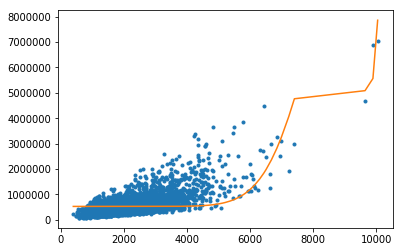

In [81]:
plt.plot(xs3['power_1'],ys3,'.',
xs3['power_1'],models3_15.predict(xs3),'-')


In [82]:
polys4_15data=polynomial_dataframe(set4['sqft_living'],15)

In [83]:
xs4=polys4_15data

In [84]:
ys4=set4['price']

In [85]:
models4_15=lr.fit(xs4,ys4)

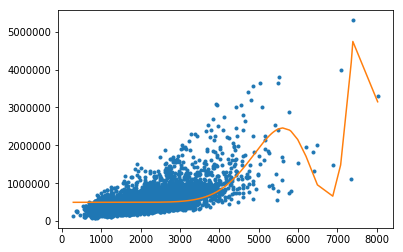

In [86]:
plt.plot(xs4['power_1'],ys4,'.',
xs4['power_1'],models4_15.predict(xs4),'-')


In [87]:
models4_15.coef_

array([ 1.37128602e-76, -4.21253685e-39,  2.99860811e-44,  2.82576230e-49,
        2.58496378e-70,  5.32307790e-58,  1.27061370e-54,  4.87824481e-51,
        1.73529592e-47,  5.46986993e-44,  1.39567135e-40,  2.25005678e-37,
       -9.43802337e-41,  1.31552211e-44, -6.09068656e-49])

In [88]:
train_data=pd.read_csv('wk3_kc_house_train_data.csv',dtype=dtype_dict)

In [89]:
test_data=pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)

In [90]:
valid_data=pd.read_csv('wk3_kc_house_valid_data.csv',dtype=dtype_dict)

In [96]:
polyt_1data=polynomial_dataframe(train_data['sqft_living'],1)

In [97]:
xt1=polyt_1data

In [98]:
yt1=train_data['price']

In [99]:
modelt_1=lr.fit(xt1,yt1)

In [100]:
modelt_1.coef_

array([288.59846375])

In [101]:
modelt_1.intercept_

-59493.31716521003

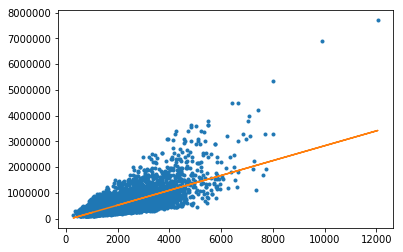

In [102]:
plt.plot(xt1,yt1,'.',
        xt1,modelt_1.predict(xt1),'-')

In [110]:
x_valid=valid_data['sqft_living']
x_valid=np.array(x_valid).reshape(-1,1)

In [111]:
y_vpredict=modelt_1.predict(x_valid)

In [113]:
y_vpredict

array([281052.87005572, 682204.73466343, 162727.49991964, ...,
       382062.33236702, 607169.13408933, 402264.22482928])

In [114]:
RSS1=np.sum(valid_data['price']-y_vpredict)**2

In [115]:
RSS1

196278119885786.78

In [116]:
polyt_2data=polynomial_dataframe(train_data['sqft_living'],2)

In [117]:
modelt_2=lr.fit(polyt_2data,yt1)

In [118]:
modelt_2.coef_

array([1.22673842, 0.0522949 ])

In [119]:
modelt_2.intercept_

267506.2801322418

In [121]:
x_valid2=polynomial_dataframe(valid_data['sqft_living'],2)

In [122]:
y_v2predict=modelt_2.predict(x_valid2)

In [123]:
y_v2predict

array([341769.25477026, 616061.60443274, 299456.51685951, ...,
       391800.32896214, 549390.87918327, 403344.01395646])

In [124]:
RSS2=np.sum(valid_data['price']-y_v2predict)**2

In [125]:
RSS2

108514027231632.23

In [126]:
polyt_3data=polynomial_dataframe(train_data['sqft_living'],3)

In [127]:
modelt_3=lr.fit(polyt_3data,yt1)

In [129]:
modelt_3.coef_

array([7.50292074e+00, 5.03063603e-02, 1.67090667e-07])

In [131]:
modelt_3.intercept_

262170.6483399361

In [132]:
x_valid3=polynomial_dataframe(valid_data['sqft_living'],3)

In [133]:
y_v3predict=modelt_3.predict(x_valid3)
y_v3predict

array([341345.20619605, 616557.9298174 , 297850.82072875, ...,
       392010.72397132, 550001.78930903, 403644.00724589])

In [134]:
RSS3=np.sum(valid_data['price']-y_v3predict)**2
RSS3

113357143332640.97

In [135]:
polyt_4data=polynomial_dataframe(train_data['sqft_living'],4)

In [136]:
modelt_4=lr.fit(polyt_4data,yt1)
modelt_4.coef_

array([-1.53852740e+01,  6.08970914e-02, -1.61496586e-06,  9.11725279e-11])

In [138]:
modelt_4.intercept_

277368.46421171306

In [139]:
x_valid4=polynomial_dataframe(valid_data['sqft_living'],4)

In [140]:
y_v4predict=modelt_4.predict(x_valid4)
y_v4predict

array([341530.27358637, 616611.49519955, 300922.45340032, ...,
       391098.47997816, 549470.79310339, 402631.18782831])

In [141]:
RSS4=np.sum(valid_data['price']-y_v4predict)**2
RSS4

114920874037156.8

In [142]:
polyt_5data=polynomial_dataframe(train_data['sqft_living'],5)

In [143]:
modelt_5=lr.fit(polyt_5data,yt1)
modelt_5.coef_

array([ 3.20207736e-05,  5.44917945e-02, -6.59421425e-07,  5.05182509e-11,
       -3.19189120e-16])

In [144]:
x_valid5=polynomial_dataframe(valid_data['sqft_living'],5)

In [145]:
y_v5predict=modelt_5.predict(x_valid5)
y_v5predict

array([341016.05491641, 617015.46252304, 298152.71384588, ...,
       391600.15607203, 550190.79187187, 403253.66396057])

In [146]:
RSS5=np.sum(valid_data['price']-y_v5predict)**2
RSS5

116159871717107.28

In [159]:
def poly_df(degree):
        poly_data=polynomial_dataframe(train_data['sqft_living'],degree)
        model=lr.fit(poly_data,yt1)
        x_valid=polynomial_dataframe(valid_data['sqft_living'],degree)
        y_predict=model.predict(x_valid)
        name='RSS'+str(degree)
        name=np.sum(valid_data['price']-y_predict)**2
        print(name)

In [161]:
poly_df(1)

196278119885786.78


In [162]:
poly_df(2)

108514027231632.23


In [163]:
poly_df(3)

113357143332640.97


In [164]:
poly_df(4)

114920874037156.8


In [165]:
poly_df(5)

116159871717107.28


In [166]:
poly_df(6)

30805262375584.79


In [167]:
poly_df(7)

307396492836201.9


In [168]:
poly_df(8)

5783432440375099.0


In [169]:
poly_df(9)

4.303180590233567e+16


In [170]:
poly_df(10)

2.4259517679328822e+17


In [171]:
poly_df(11)

1.1820473529025708e+18


In [172]:
poly_df(12)

5.199784470987607e+18


In [173]:
poly_df(13)

8.424381468663973e+17


In [174]:
poly_df(14)

2.4494823049858207e+18


In [175]:
poly_df(15)

7.236337444368605e+18
